<a href="https://colab.research.google.com/github/GurnoorArora/EDA-22BDS0020/blob/main/22BDS0020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22BDS0020
Gurnoor Arora

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/salemprakash/EDA/main/Data/GSS7402.csv'
df=pd.read_csv(url)
df

,rownames,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,2002,1,NaN,cauc,no,no,no
1,2,1,30,13,2002,4,19.0,cauc,yes,no,no
2,3,1,55,2,2002,1,27.0,cauc,no,no,yes
3,4,2,57,16,2002,1,22.0,cauc,no,no,no
4,5,2,71,12,2002,6,29.0,cauc,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...
9115,9116,3,30,12,1998,2,21.0,cauc,no,no,no
9116,9117,2,37,12,1998,3,23.0,cauc,no,no,no
9117,9118,3,59,9,1998,5,20.0,cauc,no,no,no
9118,9119,2,73,14,1998,5,22.0,cauc,yes,no,no


In [ ]:
#Initial Data Exploration

#Checking Dimensions
rows=df.shape[0]
cols=df.shape[1]
print(f"The dataset has {rows} rows and {cols} columns")

#checking data type and info
df.info()

#preview of the data
df.head()

#summary statistics- mean median and sd etc for numerical data
df.describe()

#summary statistics for categorical data- this will include counts,unique values and the most requent categories
df.describe(include='object')



The dataset has 9120 rows and 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       9120 non-null   int64  
 1   kids           9120 non-null   int64  
 2   age            9120 non-null   int64  
 3   education      9120 non-null   int64  
 4   year           9120 non-null   int64  
 5   siblings       9120 non-null   int64  
 6   agefirstbirth  3312 non-null   float64
 7   ethnicity      9120 non-null   object 
 8   city16         9120 non-null   object 
 9   lowincome16    9120 non-null   object 
 10  immigrant      9120 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 783.9+ KB


,ethnicity,city16,lowincome16,immigrant
count,9120,9120,9120,9120
unique,2,2,2,2
top,cauc,no,no,no
freq,7335,5246,7182,8122


**Handling Missing Values**

In [ ]:
print("Column wise missing values")
print(df.isnull().sum())

Column wise missing values
rownames            0
kids                0
age                 0
education           0
year                0
siblings            0
agefirstbirth    5808
ethnicity           0
city16              0
lowincome16         0
immigrant           0
dtype: int64


As we see there are 5808 missing values in agefirstbirth

In [ ]:
# since the column agefirstbith has missing values this could mean, two things
#if a person had 0 kids then this field is meaningless for them
#if a person had more than 0 kids and this field is empty, this would mean the value is genuinely missing
print(df[df['agefirstbirth'].isnull()]['kids'].value_counts())


kids
0    2127
2    1164
1     787
3     730
4     442
5     235
6     145
8     110
7      68
Name: count, dtype: int64


This shows The people wih '0' kids have 2127 Nan values because its an invalid column for them but rest, 3681 values are genuinely missing

In [ ]:
#step-1
#Handling 2127 Nan values becuase the column is meaningless to them
# For people with 0 kids, fill NaN in 'agefirstbirth' with 0
df.loc[df['kids'] == 0, 'agefirstbirth'] = df.loc[df['kids'] == 0, 'agefirstbirth'].fillna(0)

#step-2
#Now I will handle the rest 3681 cases whose values are genuinely missing
# First, calculate the median age of first birth ONLY for parents
median_age = df[df['agefirstbirth'] > 0]['agefirstbirth'].median()

# Now, fill the remaining NaNs with this median value
df['agefirstbirth'] = df['agefirstbirth'].fillna(median_age)

print("Column wise missing values")
print(df.isnull().sum())

Column wise missing values
kids             0
age              0
education        0
year             0
siblings         0
agefirstbirth    0
ethnicity        0
city16           0
lowincome16      0
immigrant        0
has_children     0
dtype: int64


Missing Values Handled

***Handling Duplicate Data***

In [ ]:
rows_duplicate=df.duplicated().sum()
print(f"The dataset has {rows_duplicate} duplicate rows")

The dataset has 0 duplicate rows


***Data Cleaning and Preparation***

In [ ]:
# We will drop rownames as its uncessary
df.drop('rownames',axis=1,inplace=True)
df.head()

,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,0,25,14,2002,1,NaN,cauc,no,no,no
1,1,30,13,2002,4,19.0,cauc,yes,no,no
2,1,55,2,2002,1,27.0,cauc,no,no,yes
3,2,57,16,2002,1,22.0,cauc,no,no,no
4,2,71,12,2002,6,29.0,cauc,yes,no,no


**Univariate Analysis(For Numerical columns)**

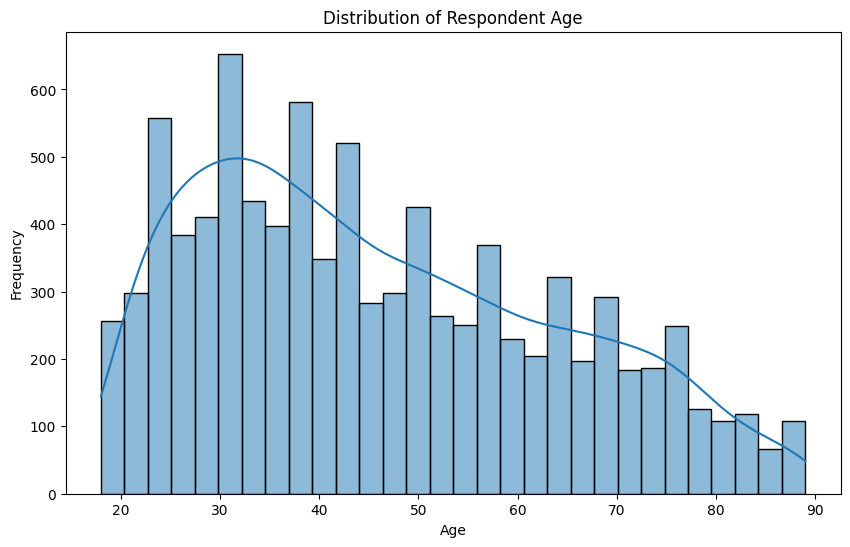

In [ ]:
#Plotting Histogram distribution of Respondent Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Distribution of Respondent Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#The goal here is to understand the distribution of age across all the respondents in our dataset

#Inference from the plot
#- The highest concentration of respondents is in their 30s as depicted by the peak of the KDE curve
#- The distribution is right skewed(+ve skewed), this means dataset contains more numbr of young and middle aged people


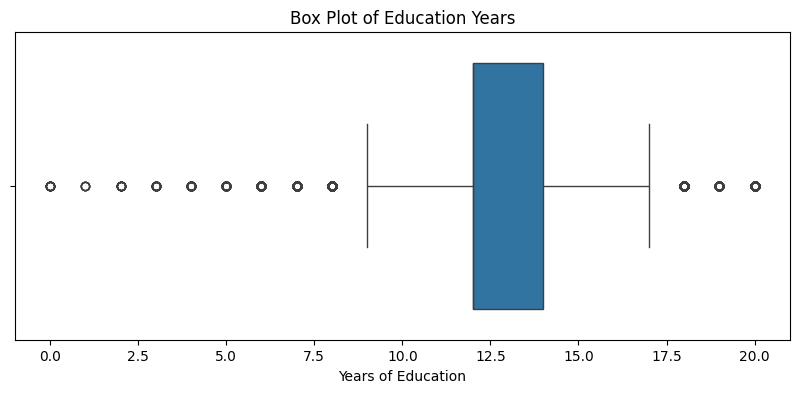

In [ ]:
#Plotting  Box plot for education
#which shows median,quartiles and potential outliers for years of education

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='education')
plt.title('Box Plot of Education Years')
plt.xlabel('Years of Education')
plt.show()

#Inference from the plot
#- Median:around 12 yo age, this means 50% of the data have 12 or fewer years of education
#- Q1 and Q3 is in between 12-14 years, this tells buld of the respondents have between 12 and 14 years of education
#- Threre are numerous outliers between 0 to 8 represting inidviduals with lesser than the majority education
#- There are numerous outliers between 18-20 representing individuals with more than majority educations

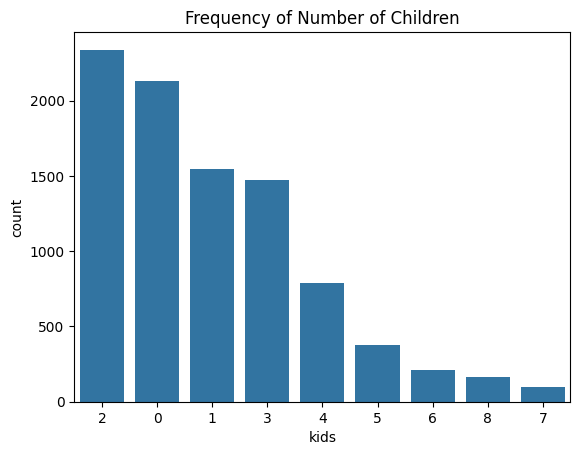

In [ ]:
#Count Plot for kids data
sns.countplot(data=df, x='kids', order = df['kids'].value_counts().index)
plt.title('Frequency of Number of Children')
plt.show()

#Inference from the plot
#1 Most common value:2
#2 Distribution shape- right skewed


***Univariate Analysis (For Categorical data)***

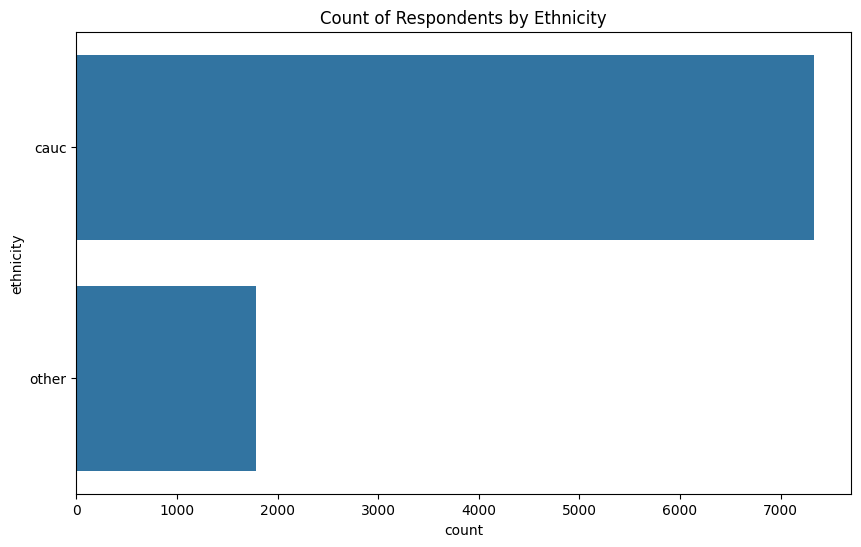

In [ ]:
#Plotting count plot for ethinicity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='ethnicity', order=df['ethnicity'].value_counts().index)
plt.title('Count of Respondents by Ethnicity')
plt.show()

#Inference
#Shows  greater than 7000 cauc ethnicity
#Shows less than 2000 others

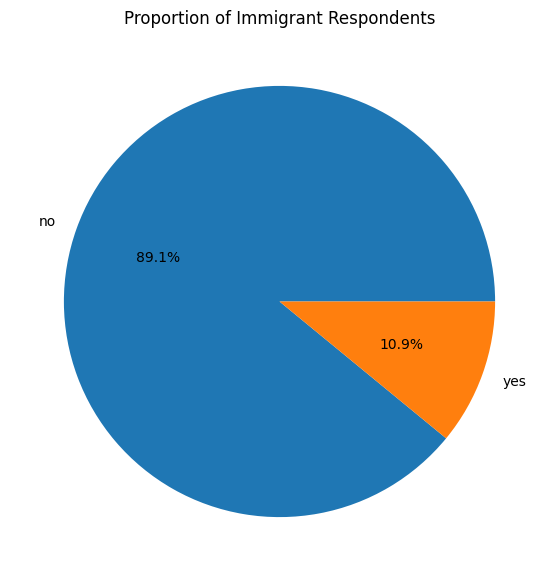

In [ ]:
#Pie chart for immigrant status proportions
plt.figure(figsize=(7, 7))
df['immigrant'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Immigrant Respondents')
plt.ylabel('')
plt.show()

**Bivariate Analysis (Numerical vs Numerical)**

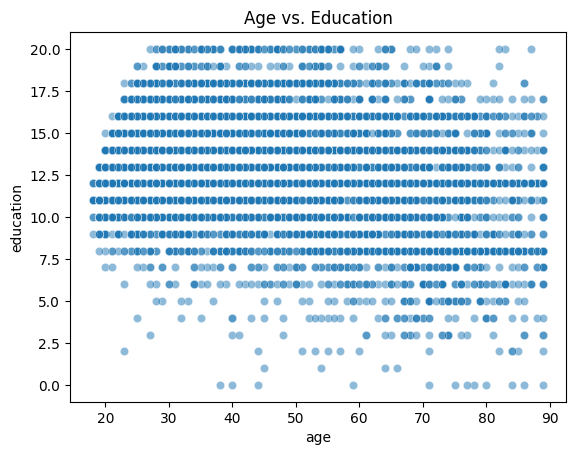

In [ ]:
# Scatter Plot to find relationships between two numerical variables(age and education)
sns.scatterplot(data=df, x='age', y='education', alpha=0.5) #
plt.title('Age vs. Education')
plt.show()

**Bivariate Analysis(Numerical vs Categorical)**

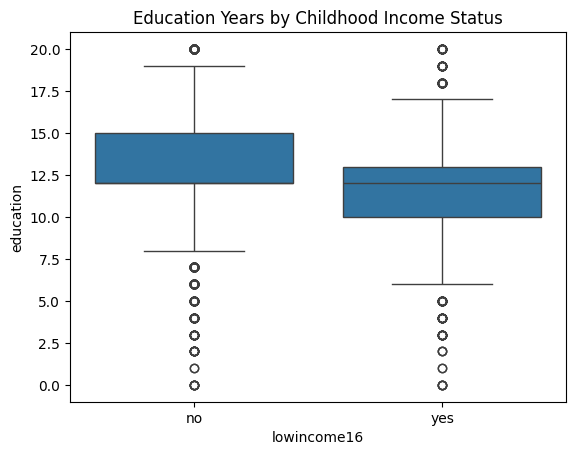

In [ ]:
# Box Plot to compare numerical distributions across categories
sns.boxplot(data=df, x='lowincome16', y='education')
plt.title('Education Years by Childhood Income Status')
plt.show()



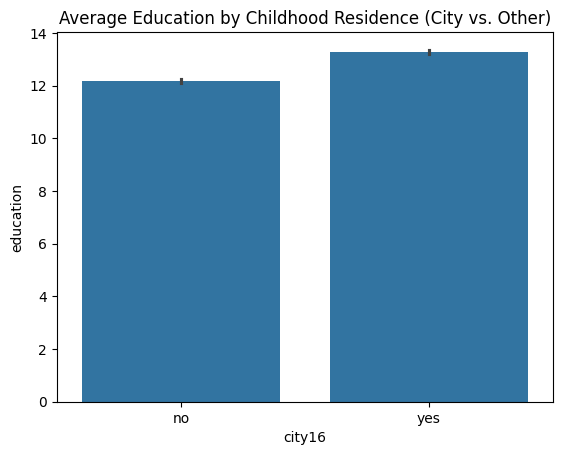

In [ ]:
# Bar Plot to compare the average of a numerical variable across categories
sns.barplot(data=df, x='city16', y='education')
plt.title('Average Education by Childhood Residence (City vs. Other)')
plt.show()

**Categorical vs Categorical**

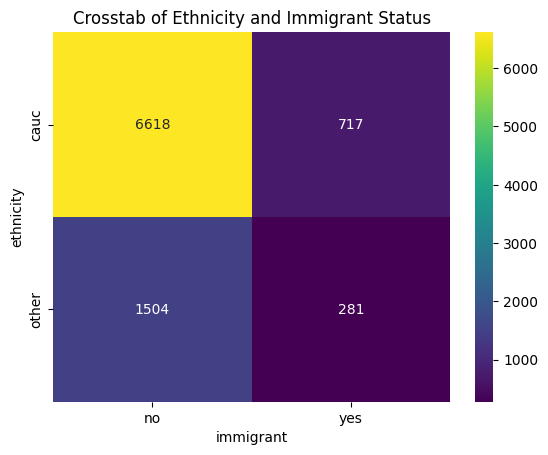

In [ ]:
# Heatmap of a Crosstab to see co-occurrence frequencies
crosstab = pd.crosstab(df['ethnicity'], df['immigrant'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Crosstab of Ethnicity and Immigrant Status')
plt.show()

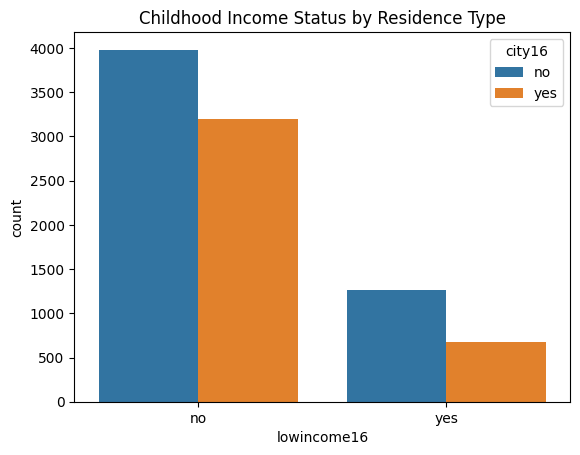

In [ ]:
# Grouped Count Plot for a more intuitive comparison
sns.countplot(data=df, x='lowincome16', hue='city16')
plt.title('Childhood Income Status by Residence Type')
plt.show()

**Multivariate analysis**

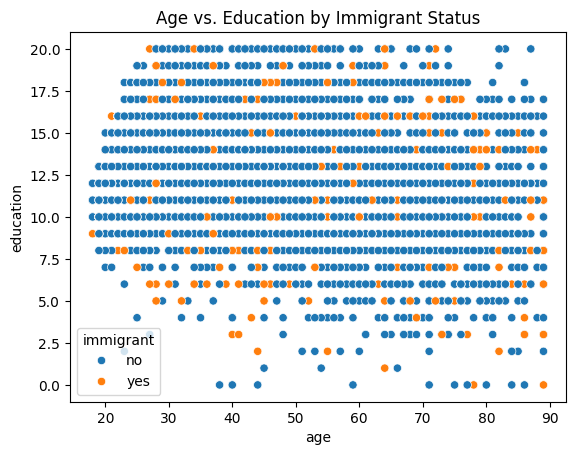

In [ ]:

# Scatter Plot with a third variable (hue)
sns.scatterplot(data=df, x='age', y='education', hue='immigrant')
plt.title('Age vs. Education by Immigrant Status')
plt.show()

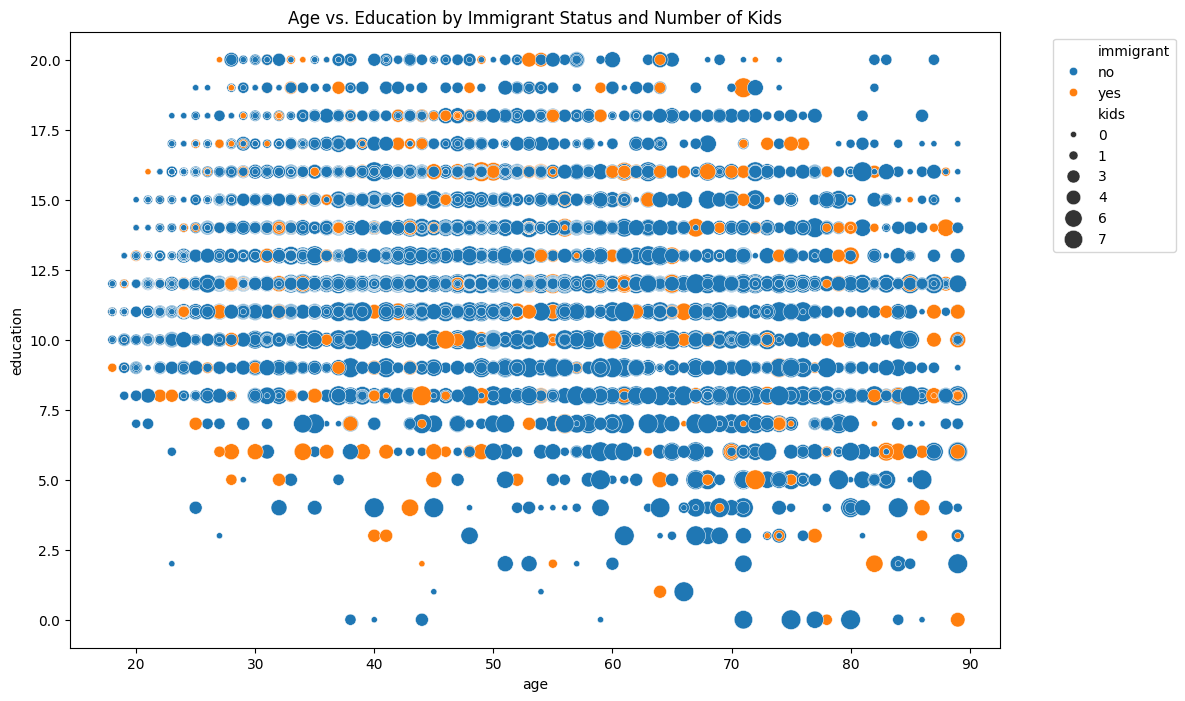

In [ ]:
# Scatter Plot with a fourth variable (size)
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='age', y='education', hue='immigrant', size='kids', sizes=(20, 200))
plt.title('Age vs. Education by Immigrant Status and Number of Kids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Pair Plot **

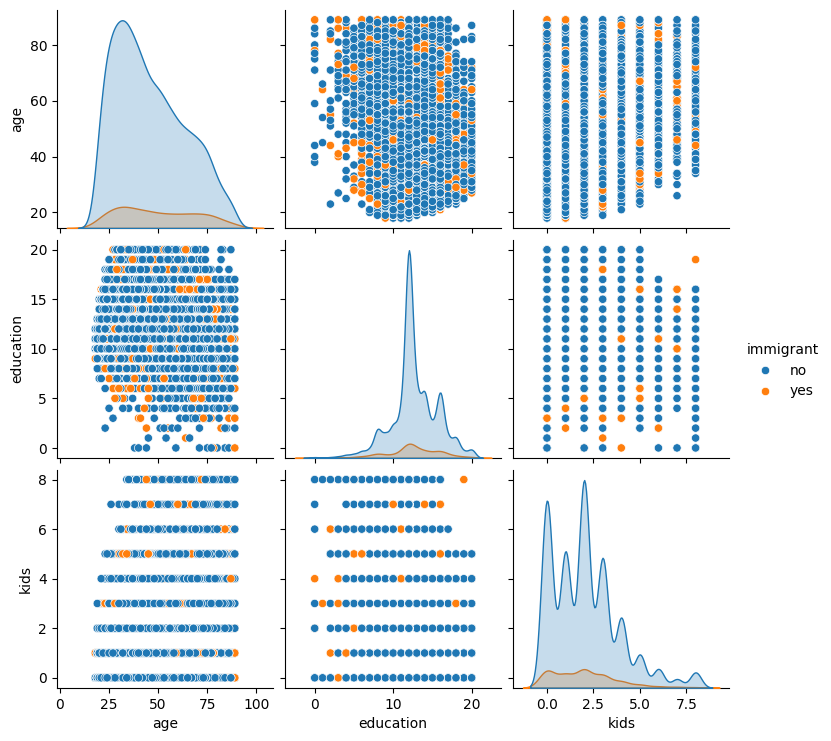

In [ ]:
# Pair Plot to see all pairwise relationships, colored by a category
sns.pairplot(df, vars=['age', 'education', 'kids'], hue='immigrant')
plt.show()



**Correlation heatmap**

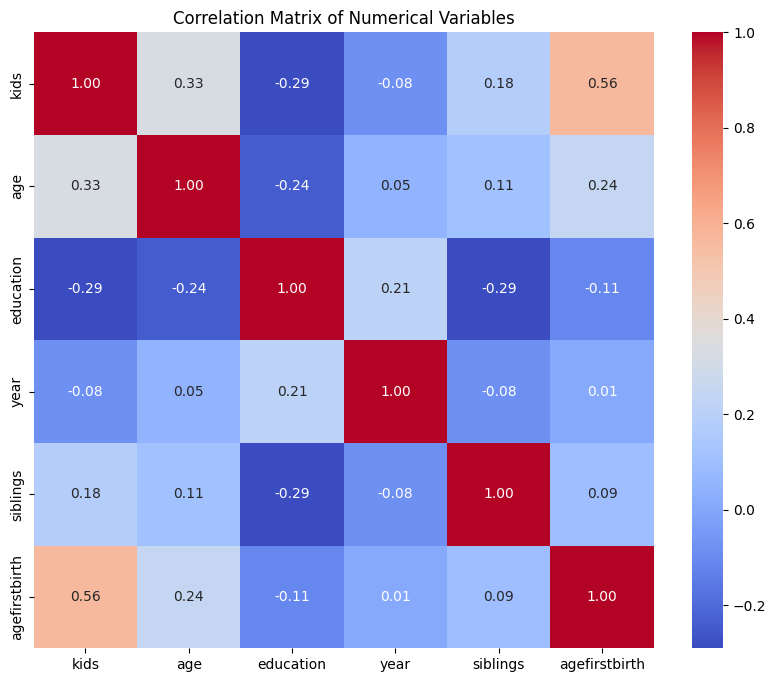

In [ ]:
# Correlation Heatmap for all numerical variables
numerical_cols = ['kids', 'age', 'education', 'year', 'siblings', 'agefirstbirth']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Relational Plot(Facet Grid)**

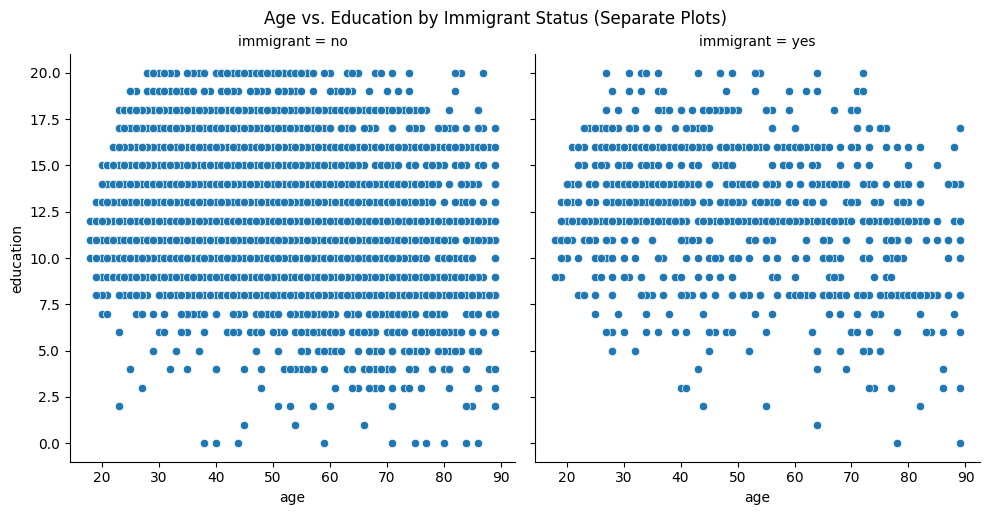

In [ ]:
# Relational Plot to create subplots for different categories
# This shows the age vs. education relationship separately for immigrants and non-immigrants
sns.relplot(data=df, x='age', y='education', col='immigrant')
plt.suptitle('Age vs. Education by Immigrant Status (Separate Plots)', y=1.02) # Add a main title
plt.show()

PHASE 2(SUBMISSION DATE-2 nd OCTOBER)   
Name- Gurnoor Arora
Reg no.-22BDS0020

**1D Analysis**

1. Measures of Central Tendency


In [10]:
# Calculating mean, median and mode for 'age'
mean_age=df['age'].mean()
median_age=df['age'].median()
mode_age=df['age'].mode()[0]
print(f"Mean age:{mean_age}")
print(f"Median age:{median_age}")
print(f"Mode age:{mode_age}")



# Calculating mean, median and mode for 'kids'
mean_kids=df['kids'].mean()
median_kids=df['kids'].median()
mode_kids=df['kids'].mode()[0]
print(f"Mean kids:{mean_kids}")

#calculating mean,median and mode for 'education'
mean_education=df['education'].mean()
median_education=df['education'].median()
mode_education=df['education'].mode()[0]
print(f"Mean education:{mean_education}")

#calculating mean, median and mode for 'siblings'
mean_siblings=df['siblings'].mean()
median_siblings=df['siblings'].median()
mode_siblings=df['siblings'].mode()[0]
print(f"Mean siblings:{mean_siblings}")
print(f"Median siblings:{median_siblings}")
print(f"Mode siblings:{mode_siblings}")

#calculating mean,median and mode for 'agefirstbirth'
mean_agefirstbirth=df['agefirstbirth'].mean()
median_agefirstbirth=df['agefirstbirth'].median()
mode_agefirstbirth=df['agefirstbirth'].mode()[0]
print(f"Mean agefirstbirth:{mean_agefirstbirth}")
print(f"Median agefirstbirth:{median_agefirstbirth}")
print(f"Mode agefirstbirth:{mode_agefirstbirth}")



Mean age:46.08201754385965
Median age:43.0
Mode age:30
Mean kids:2.0760964912280704
Mean education:12.635087719298246
Mean siblings:4.050657894736842
Median siblings:3.0
Mode siblings:2
Mean agefirstbirth:22.630736714975846
Median agefirstbirth:22.0
Mode agefirstbirth:19.0


Measures of Position


In [13]:
# Defining all the columns in an array
numerical_columns = ['age', 'kids', 'education', 'siblings', 'agefirstbirth']

print("--- Measures of Position for colums in above array---")

for col in numerical_columns:
    print(f"\n----- for columne: '{col}' -----")

    print(df[col].describe())

--- Measures of Position for colums in above array---

----- for columne: 'age' -----
count    9120.000000
mean       46.082018
std        17.923889
min        18.000000
25%        31.000000
50%        43.000000
75%        59.000000
max        89.000000
Name: age, dtype: float64

----- for columne: 'kids' -----
count    9120.000000
mean        2.076096
std         1.805099
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: kids, dtype: float64

----- for columne: 'education' -----
count    9120.000000
mean       12.635088
std         2.955190
min         0.000000
25%        12.000000
50%        12.000000
75%        14.000000
max        20.000000
Name: education, dtype: float64

----- for columne: 'siblings' -----
count    9120.000000
mean        4.050658
std         3.246137
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        35.000000
Name: siblings, dtype: float64

----- for columne

Measures of Dispersion

In [16]:
print("--- Measures of Dispersion ---")

for col in numerical_columns:
    # Range calculation
    col_range = df[col].max() - df[col].min()

    # Calculate IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    col_iqr = q3 - q1

    # Calculate Variance and Standard Deviation
    col_variance = df[col].var()
    col_std = df[col].std()

    print(f"\n----- Analyzing: '{col}' -----")
    print(f"  Range: {col_range}")
    print(f"  Interquartile Range (IQR): {col_iqr}")
    print(f"  Variance: {col_variance:.2f}")
    print(f"  Standard Deviation: {col_std:.2f}")

--- Measures of Dispersion ---

----- Analyzing: 'age' -----
  Range: 71
  Interquartile Range (IQR): 28.0
  Variance: 321.27
  Standard Deviation: 17.92

----- Analyzing: 'kids' -----
  Range: 8
  Interquartile Range (IQR): 2.0
  Variance: 3.26
  Standard Deviation: 1.81

----- Analyzing: 'education' -----
  Range: 20
  Interquartile Range (IQR): 2.0
  Variance: 8.73
  Standard Deviation: 2.96

----- Analyzing: 'siblings' -----
  Range: 35
  Interquartile Range (IQR): 4.0
  Variance: 10.54
  Standard Deviation: 3.25

----- Analyzing: 'agefirstbirth' -----
  Range: 33.0
  Interquartile Range (IQR): 6.0
  Variance: 23.61
  Standard Deviation: 4.86


Measures of Shape

In [18]:

print("--- Measures of Shape for Columns, we defined above ---")

for col in numerical_columns:
    # Calculating the Skewness
    col_skew = df[col].skew()

    # Calculating the Kurtosis
    col_kurtosis = df[col].kurtosis()

    print(f"\n----- Analyzing Column: '{col}' -----")
    print(f"  Skewness: {col_skew:.2f}")
    print(f"  Kurtosis: {col_kurtosis:.2f}")


--- Measures of Shape for Columns, we defined above ---

----- Analyzing Column: 'age' -----
  Skewness: 0.48
  Kurtosis: -0.78

----- Analyzing Column: 'kids' -----
  Skewness: 1.00
  Kurtosis: 1.03

----- Analyzing Column: 'education' -----
  Skewness: -0.26
  Kurtosis: 1.03

----- Analyzing Column: 'siblings' -----
  Skewness: 1.67
  Kurtosis: 4.79

----- Analyzing Column: 'agefirstbirth' -----
  Skewness: 0.87
  Kurtosis: 0.59


1D Plotting(Pie chart & KDE, I did not do this in univariate analysis)

--- Plotting Distributions 22BDS0020---


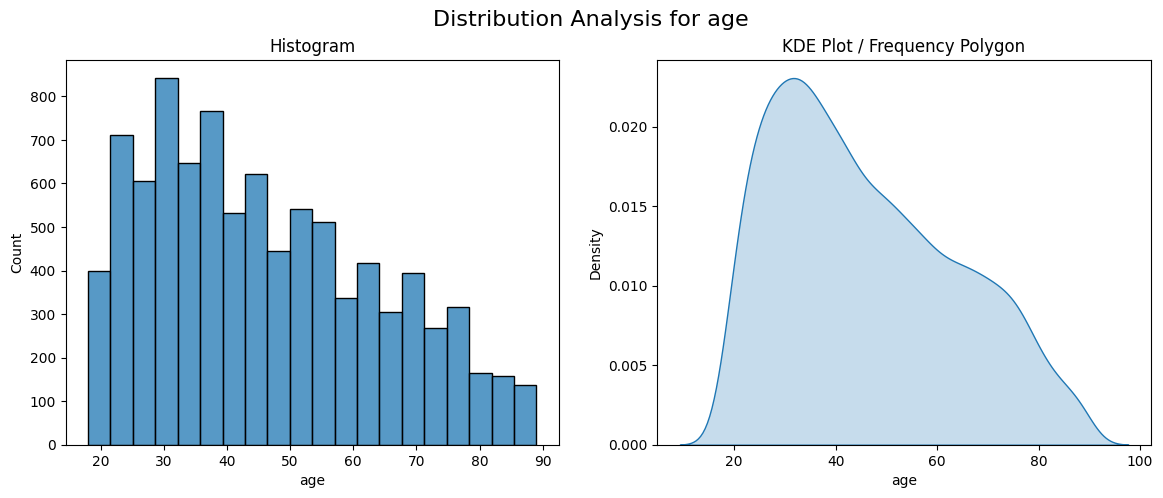

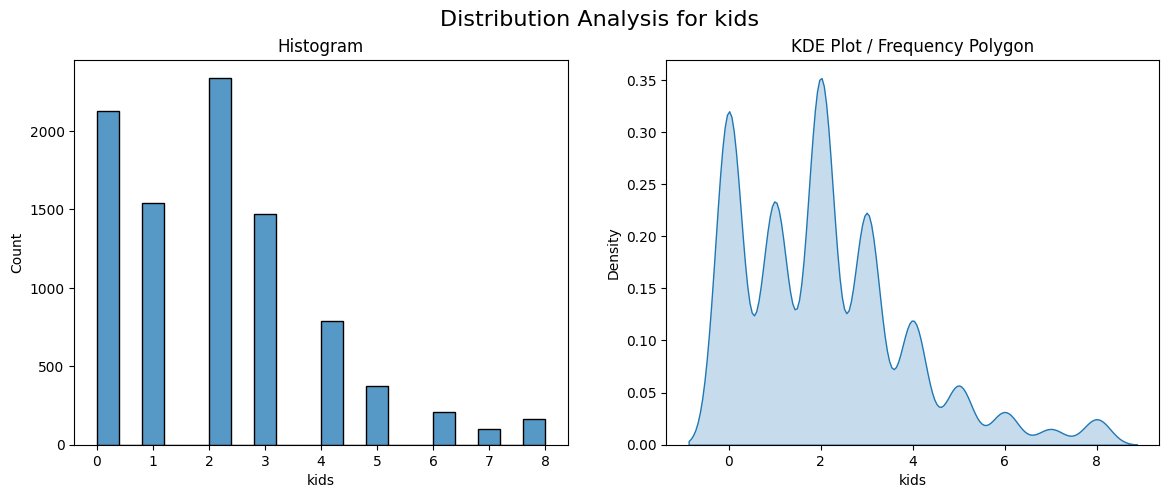

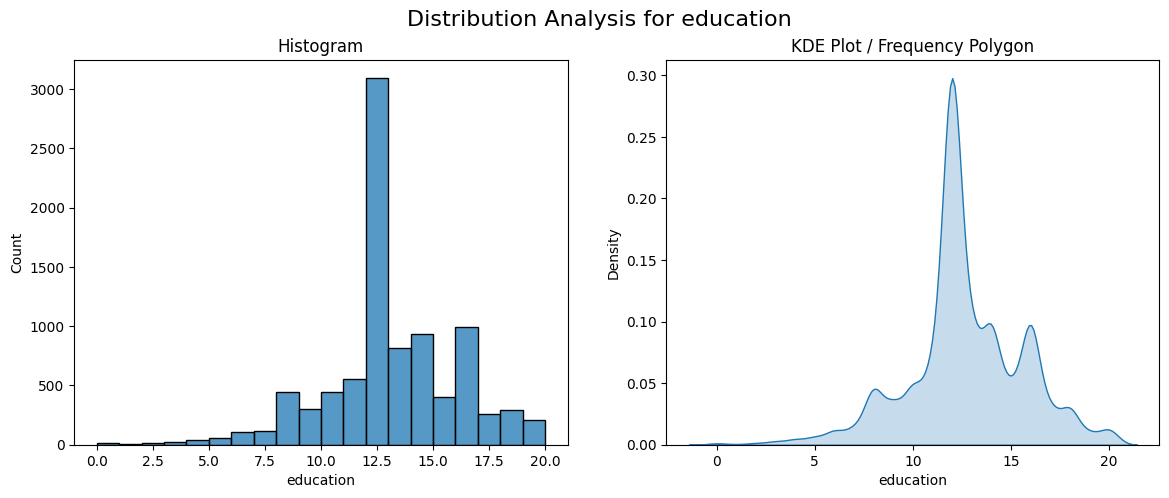

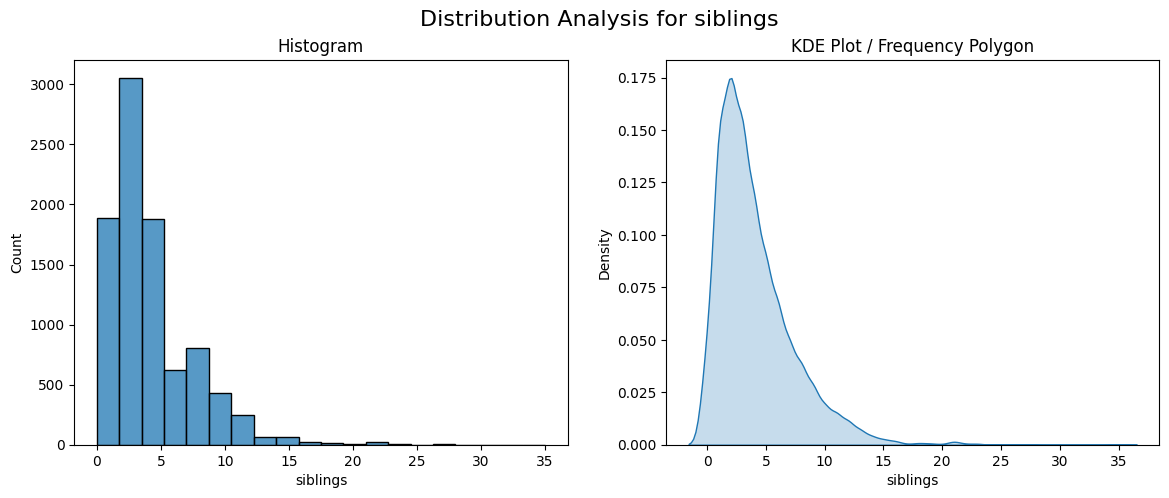

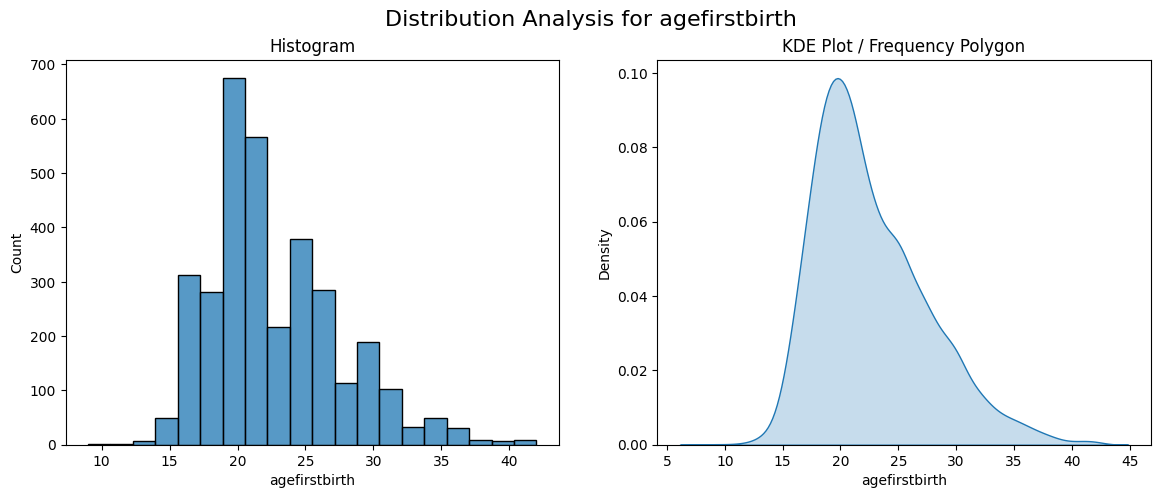

In [21]:
print("--- Plotting Distributions 22BDS0020---")

for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Distribution Analysis for {col}', fontsize=16)
    sns.histplot(data=df, x=col, bins=20, ax=axes[0])
    axes[0].set_title('Histogram')
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[1])
    axes[1].set_title('KDE Plot / Frequency Polygon')
    plt.show()


--- Plotting Frequencies for Categorical Columns ---


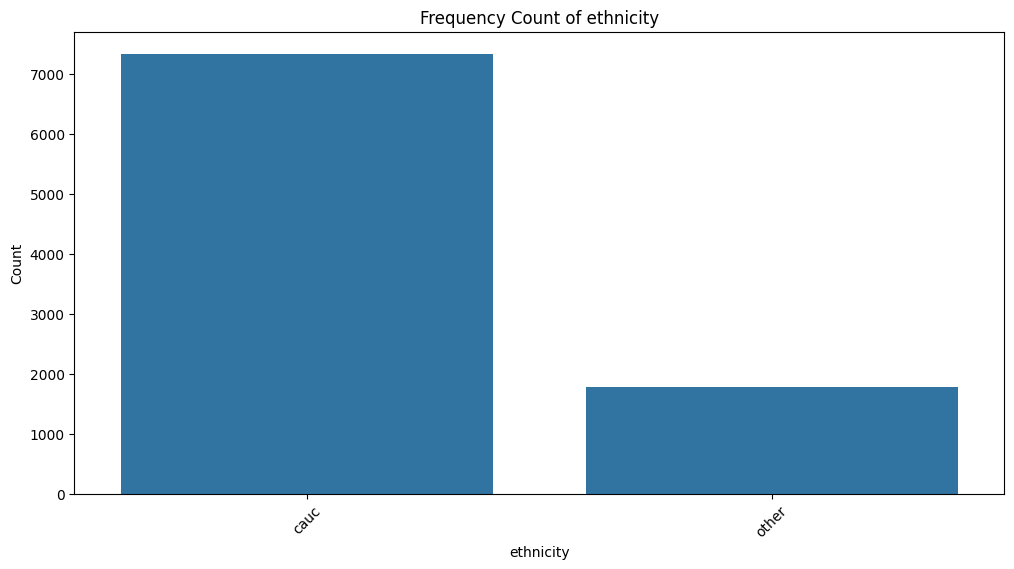

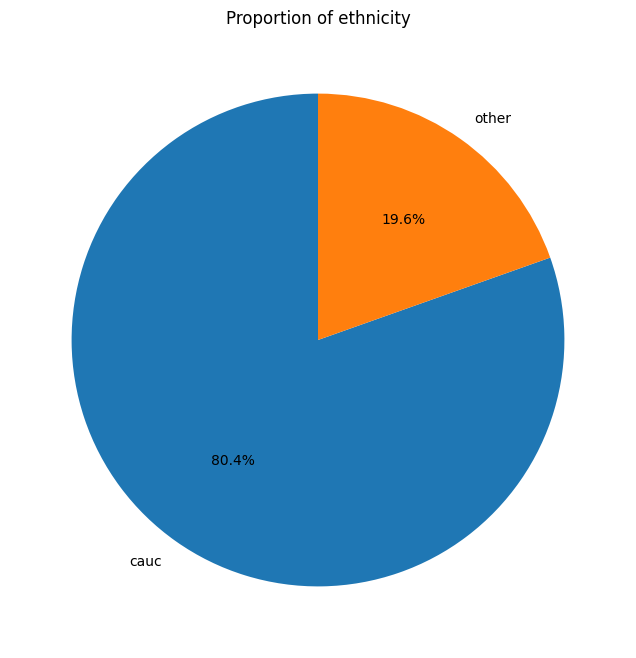

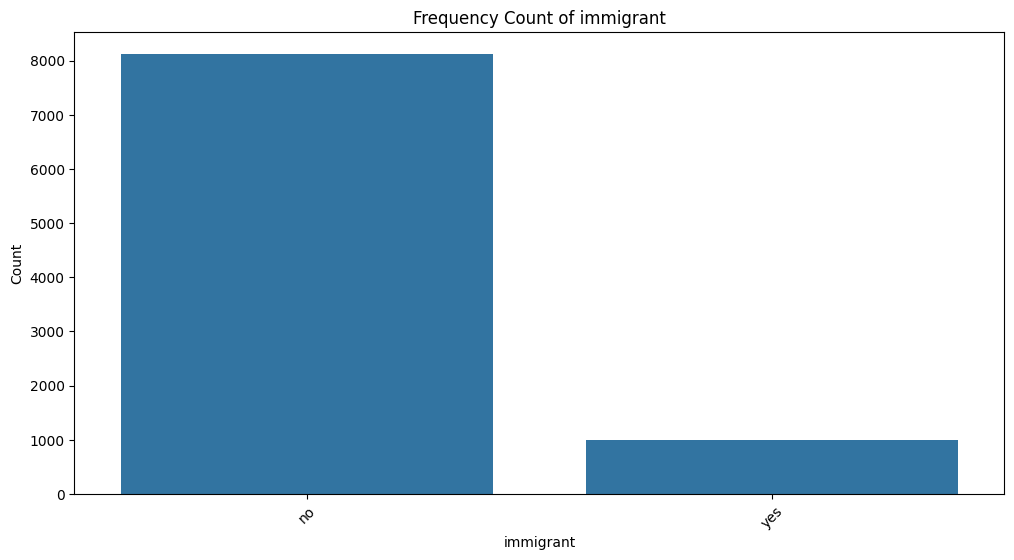

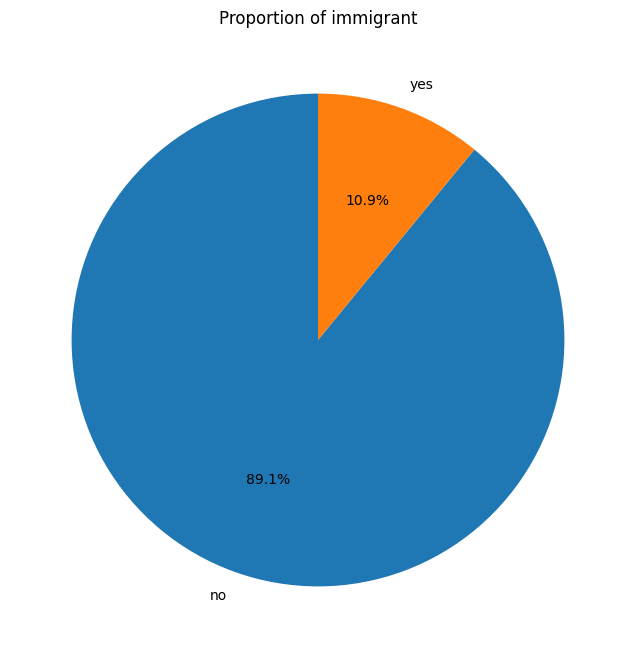

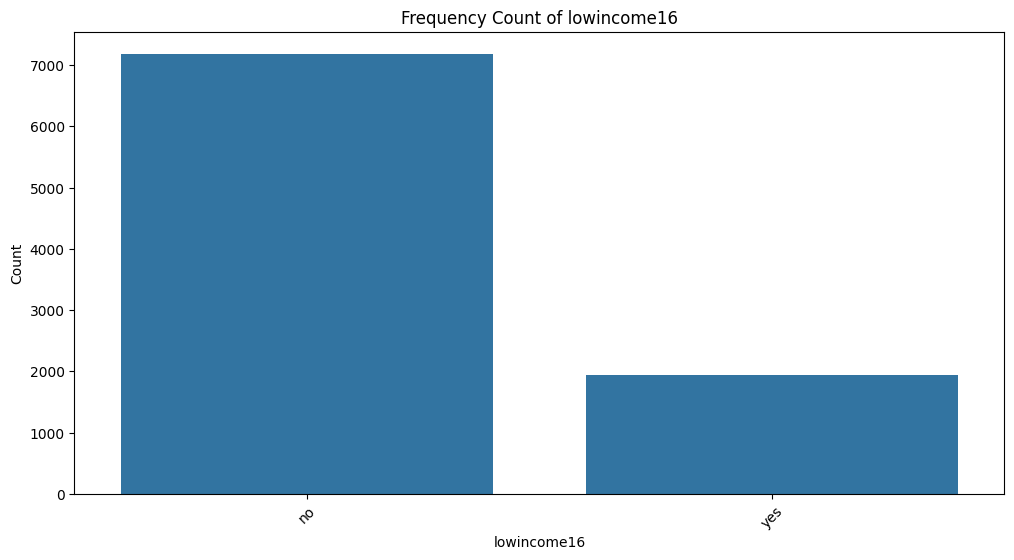

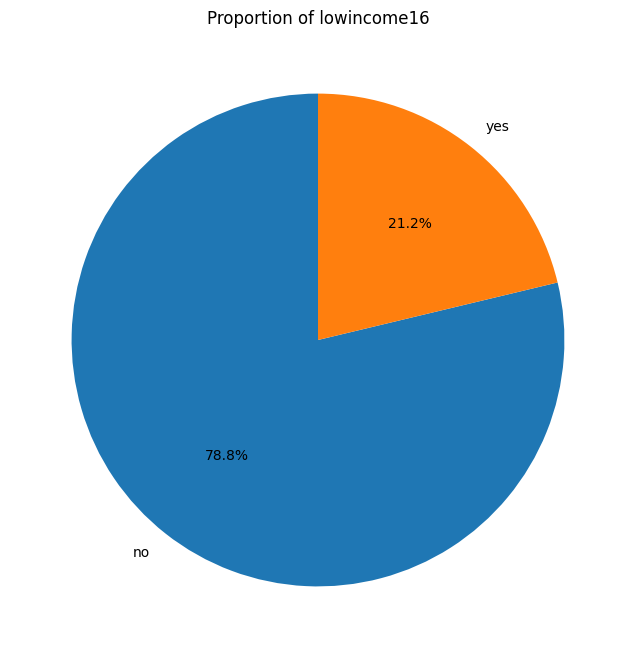

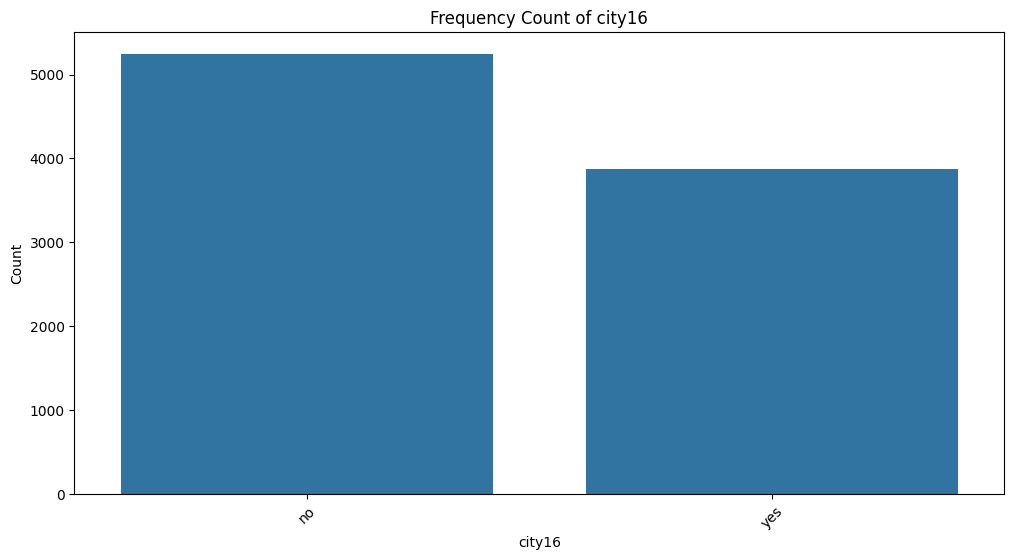

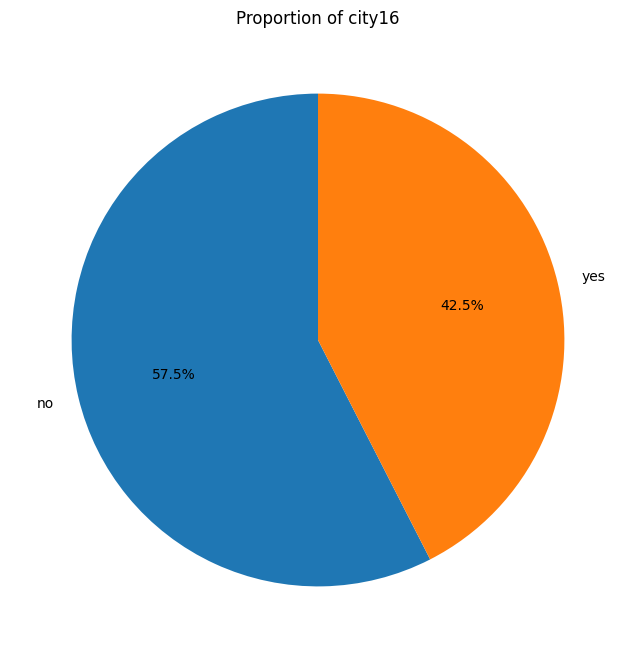

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['ethnicity', 'immigrant', 'lowincome16', 'city16']

print("\n--- Plotting Frequencies for Categorical Columns ---")


for col in categorical_columns:
    plt.figure(figsize=(12, 6))

    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    if df[col].nunique() < 10:
        plt.figure(figsize=(8, 8))
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Proportion of {col}')
        plt.ylabel('')
        plt.show()

2D Analysis

Numerical vs Numerical

--- Displaying Pair Plot of all Numerical Variables ---


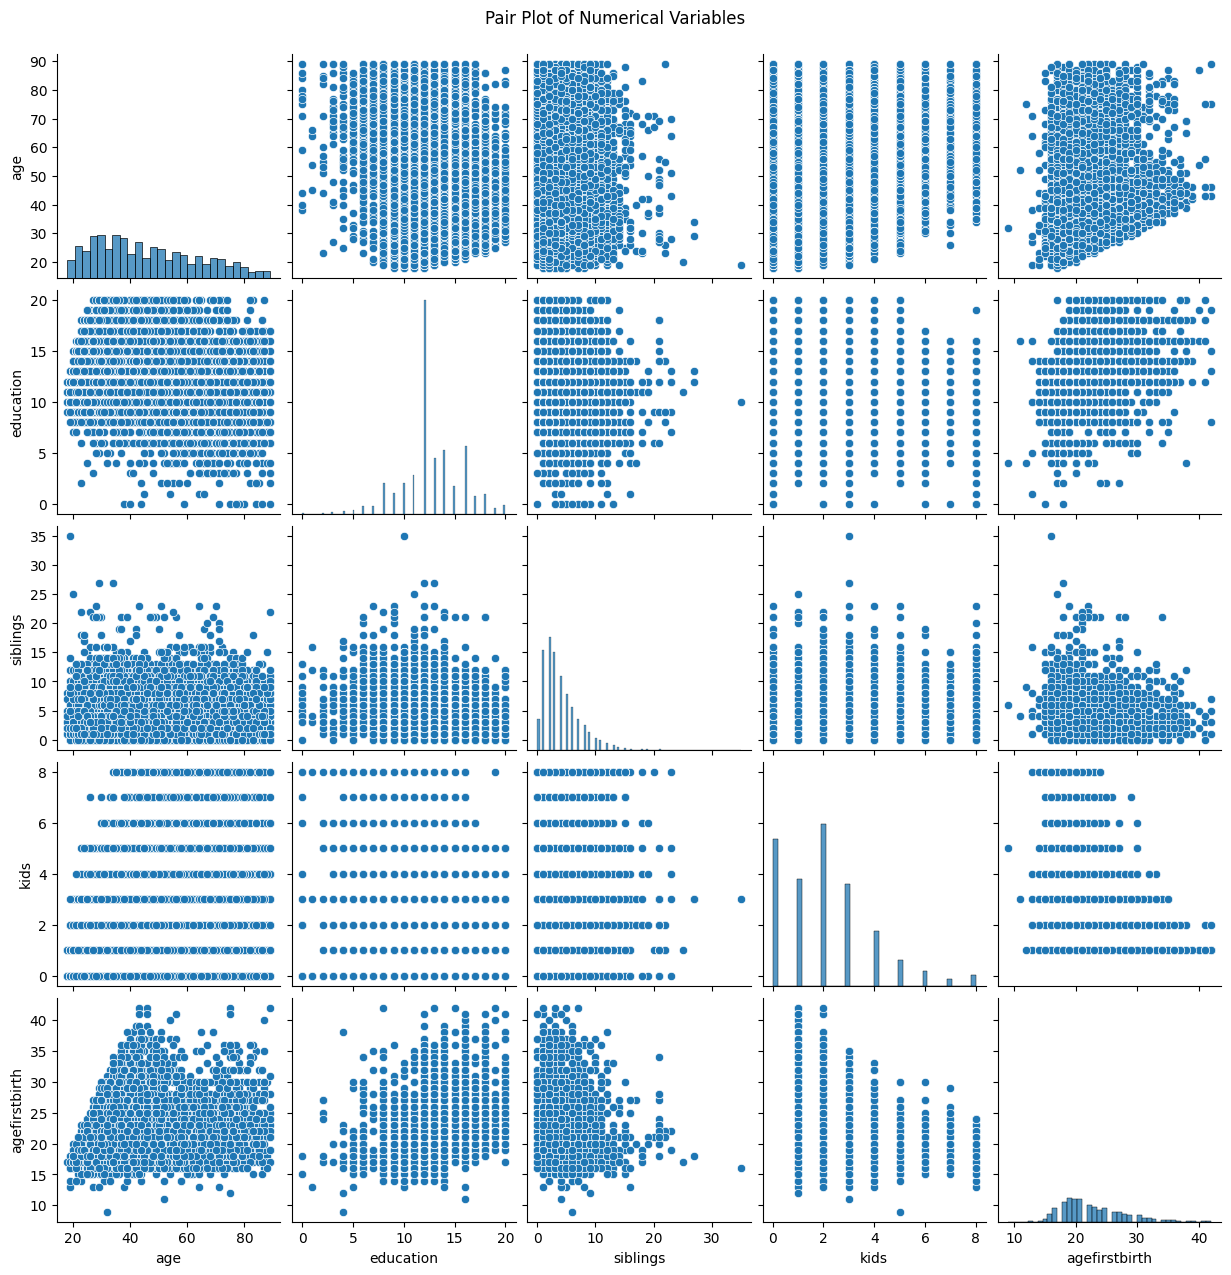


--- Displaying Correlation Heatmap ---


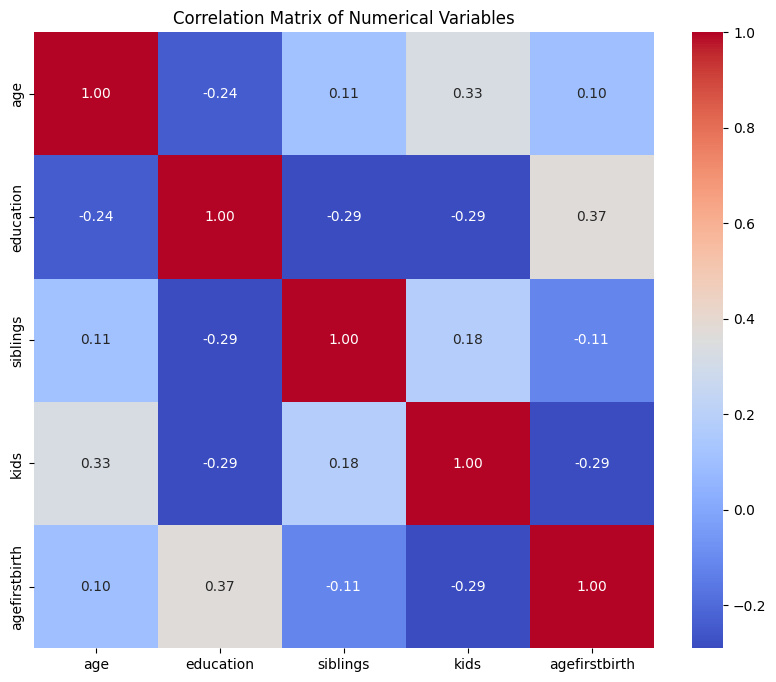

In [25]:
# --- 1. Pair Plot---

print("--- Displaying Pair Plot of all Numerical Variables ---")
numerical_columns = ['age', 'education', 'siblings', 'kids', 'agefirstbirth']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


# --- 2. Correlation Heatmap for a Numerical Summary ---


print("\n--- Displaying Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Numerical vs. Categorical Analysis


--- Numerical vs. Categorical Analysis ---


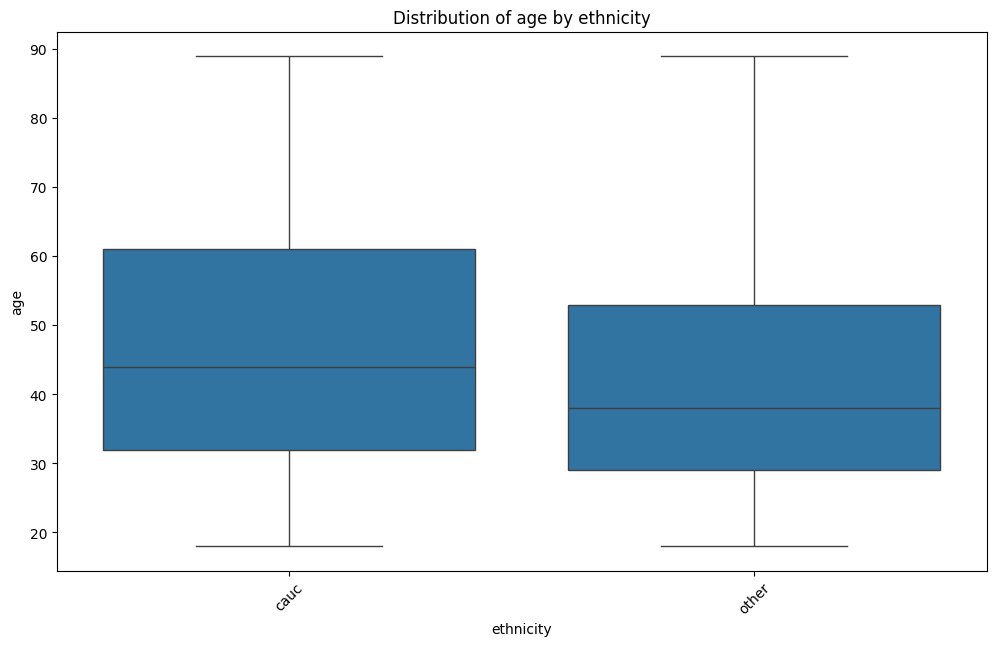


--- Summary Statistics for age grouped by ethnicity ---
            count       mean        std   min   25%   50%   75%   max
ethnicity                                                            
cauc       7335.0  47.097887  18.082024  18.0  32.0  44.0  61.0  89.0
other      1785.0  41.907563  16.624071  18.0  29.0  38.0  53.0  89.0




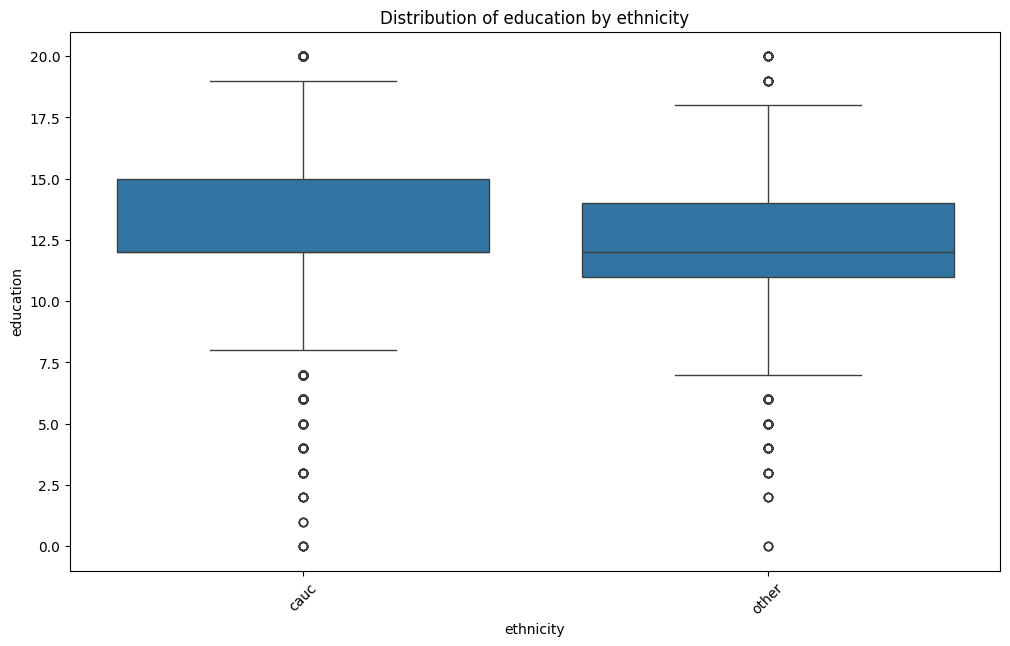


--- Summary Statistics for education grouped by ethnicity ---
            count       mean       std  min   25%   50%   75%   max
ethnicity                                                          
cauc       7335.0  12.770825  2.920960  0.0  12.0  12.0  15.0  20.0
other      1785.0  12.077311  3.029501  0.0  11.0  12.0  14.0  20.0




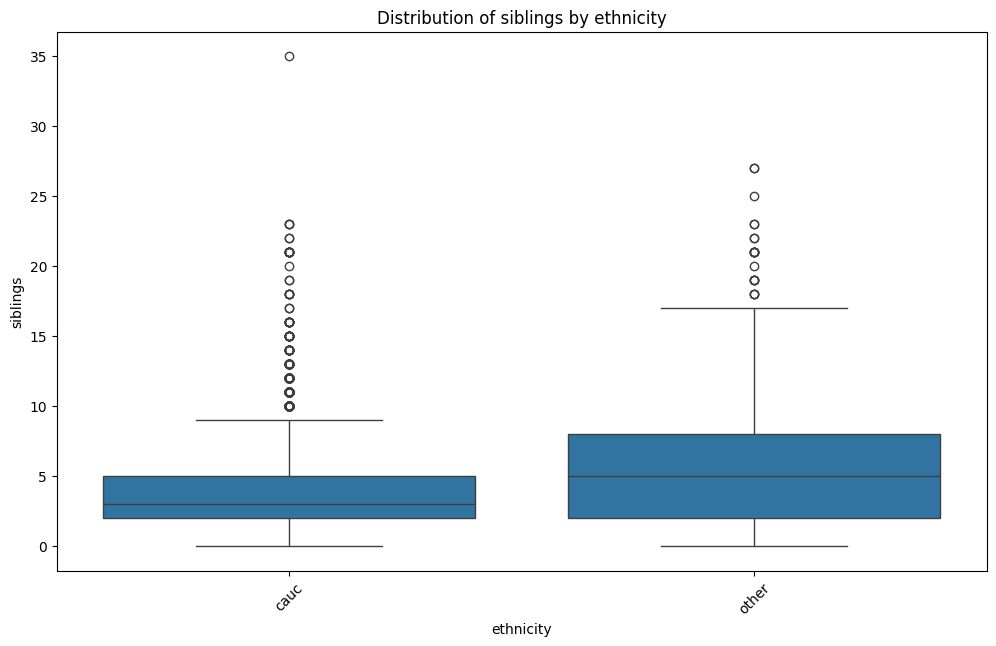


--- Summary Statistics for siblings grouped by ethnicity ---
            count      mean       std  min  25%  50%  75%   max
ethnicity                                                      
cauc       7335.0  3.719836  2.970844  0.0  2.0  3.0  5.0  35.0
other      1785.0  5.410084  3.908985  0.0  2.0  5.0  8.0  27.0




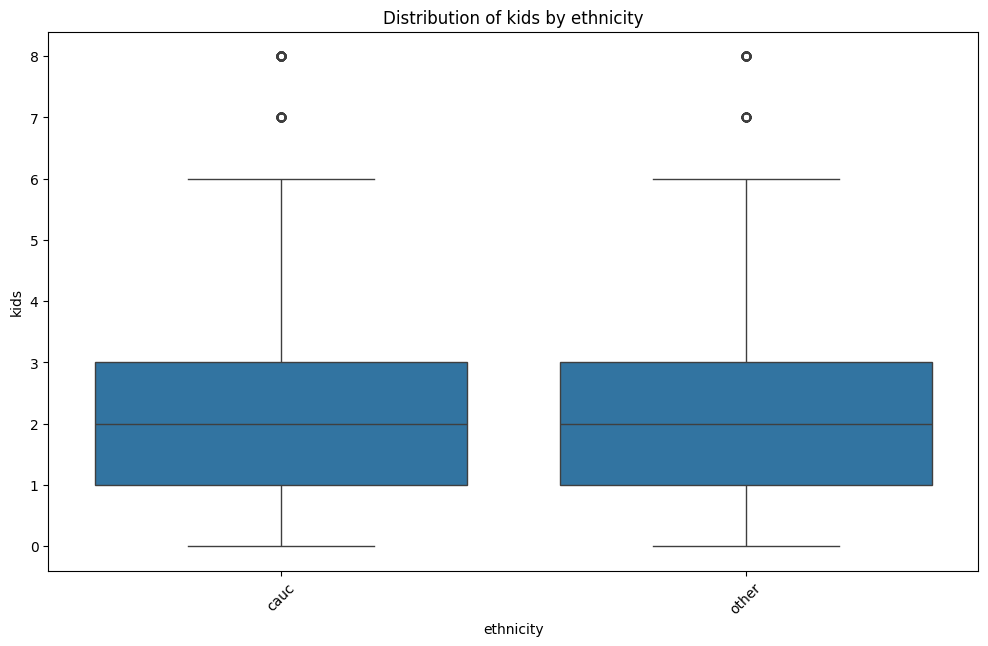


--- Summary Statistics for kids grouped by ethnicity ---
            count      mean       std  min  25%  50%  75%  max
ethnicity                                                     
cauc       7335.0  2.015951  1.737283  0.0  1.0  2.0  3.0  8.0
other      1785.0  2.323249  2.042498  0.0  1.0  2.0  3.0  8.0




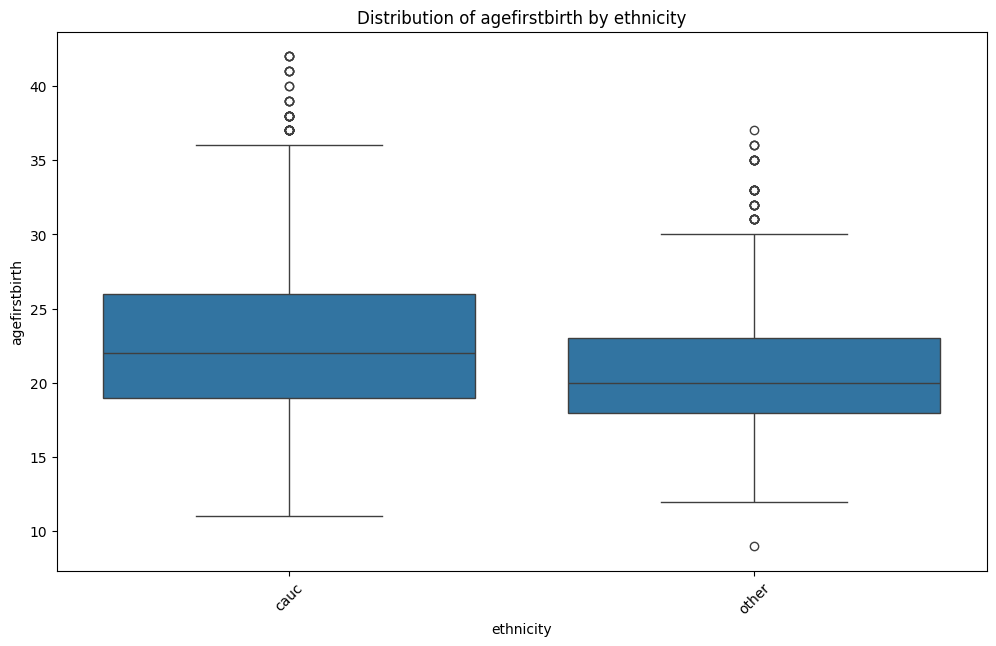


--- Summary Statistics for agefirstbirth grouped by ethnicity ---
            count       mean       std   min   25%   50%   75%   max
ethnicity                                                           
cauc       2569.0  23.152199  4.835273  11.0  19.0  22.0  26.0  42.0
other       743.0  20.827725  4.500067   9.0  18.0  20.0  23.0  37.0




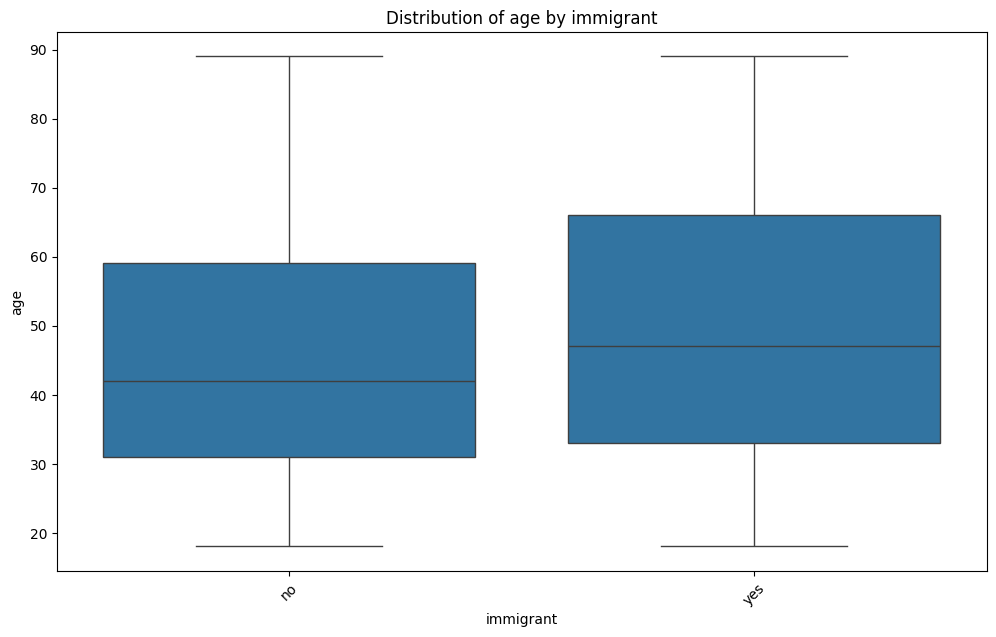


--- Summary Statistics for age grouped by immigrant ---
            count       mean        std   min   25%   50%   75%   max
immigrant                                                            
no         8122.0  45.628417  17.695813  18.0  31.0  42.0  59.0  89.0
yes         998.0  49.773547  19.298812  18.0  33.0  47.0  66.0  89.0




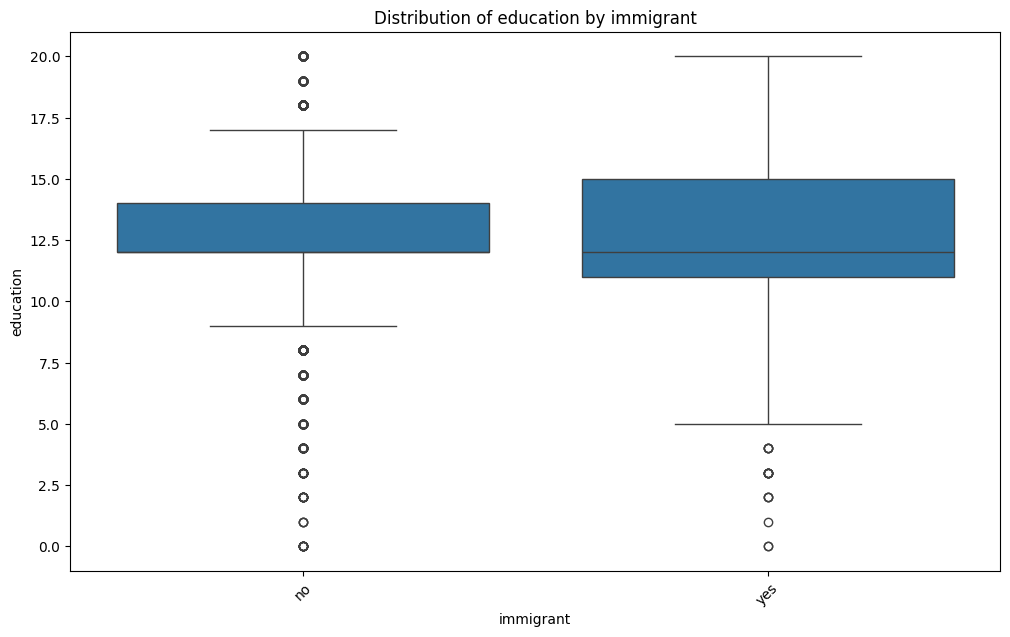


--- Summary Statistics for education grouped by immigrant ---
            count       mean       std  min   25%   50%   75%   max
immigrant                                                          
no         8122.0  12.652179  2.902436  0.0  12.0  12.0  14.0  20.0
yes         998.0  12.495992  3.352193  0.0  11.0  12.0  15.0  20.0




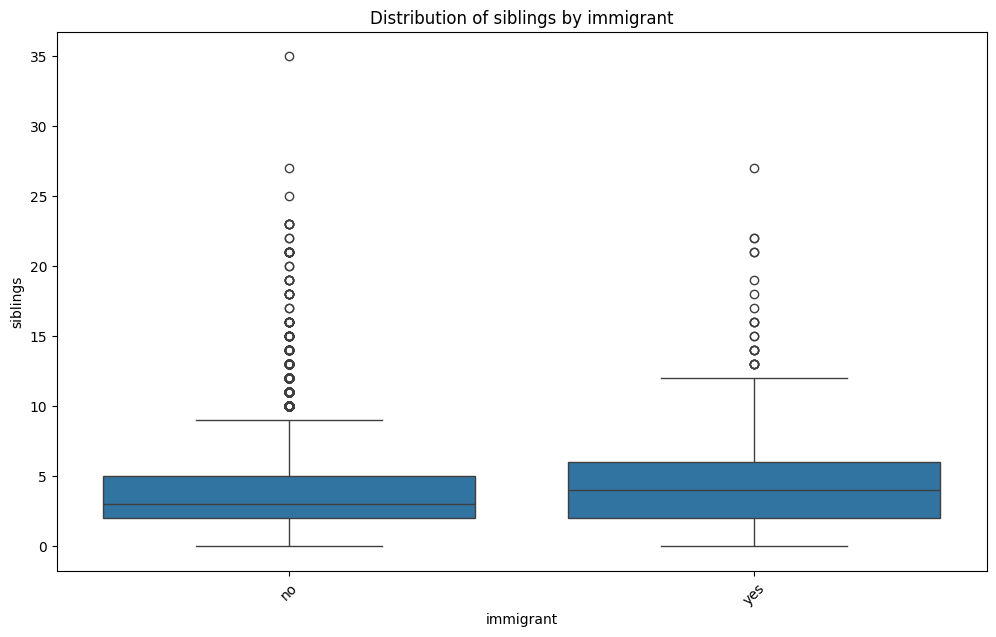


--- Summary Statistics for siblings grouped by immigrant ---
            count      mean       std  min  25%  50%  75%   max
immigrant                                                      
no         8122.0  3.996306  3.220079  0.0  2.0  3.0  5.0  35.0
yes         998.0  4.492986  3.420607  0.0  2.0  4.0  6.0  27.0




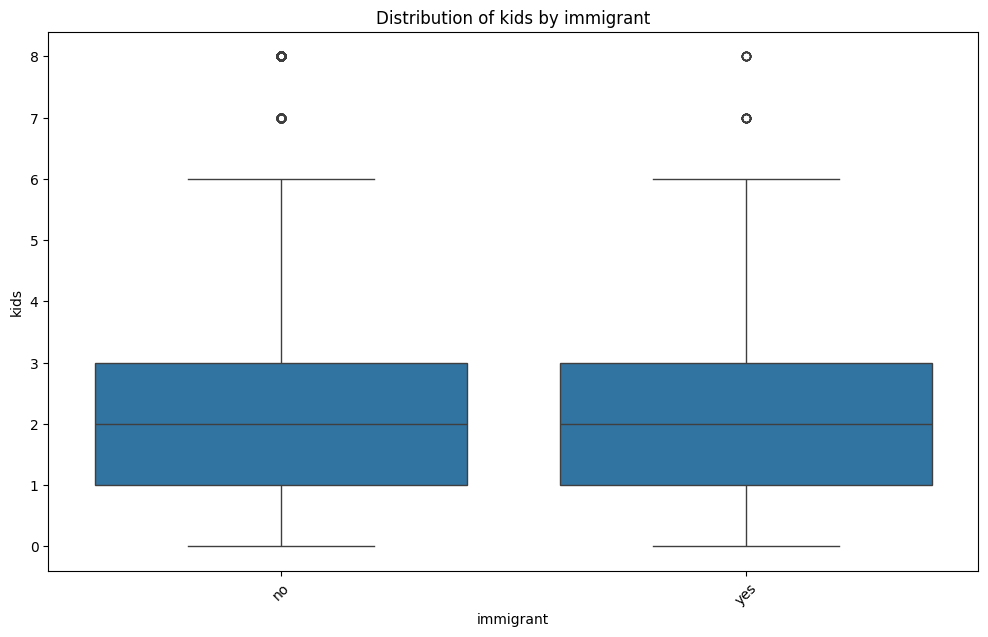


--- Summary Statistics for kids grouped by immigrant ---
            count      mean       std  min  25%  50%  75%  max
immigrant                                                     
no         8122.0  2.084954  1.815847  0.0  1.0  2.0  3.0  8.0
yes         998.0  2.004008  1.714293  0.0  1.0  2.0  3.0  8.0




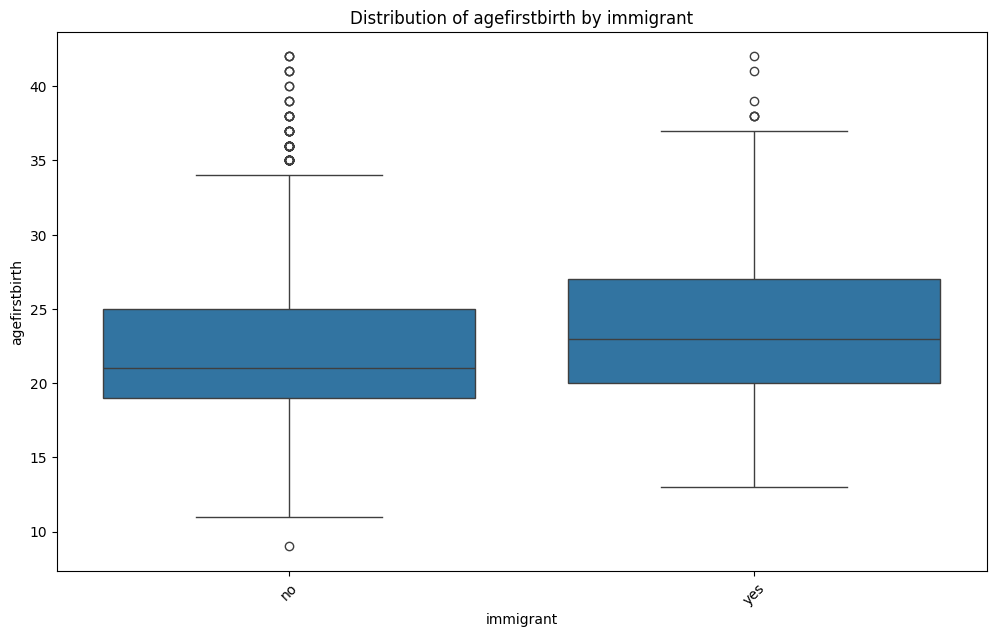


--- Summary Statistics for agefirstbirth grouped by immigrant ---
            count       mean       std   min   25%   50%   75%   max
immigrant                                                           
no         2928.0  22.500000  4.792874   9.0  19.0  21.0  25.0  42.0
yes         384.0  23.627604  5.238377  13.0  20.0  23.0  27.0  42.0




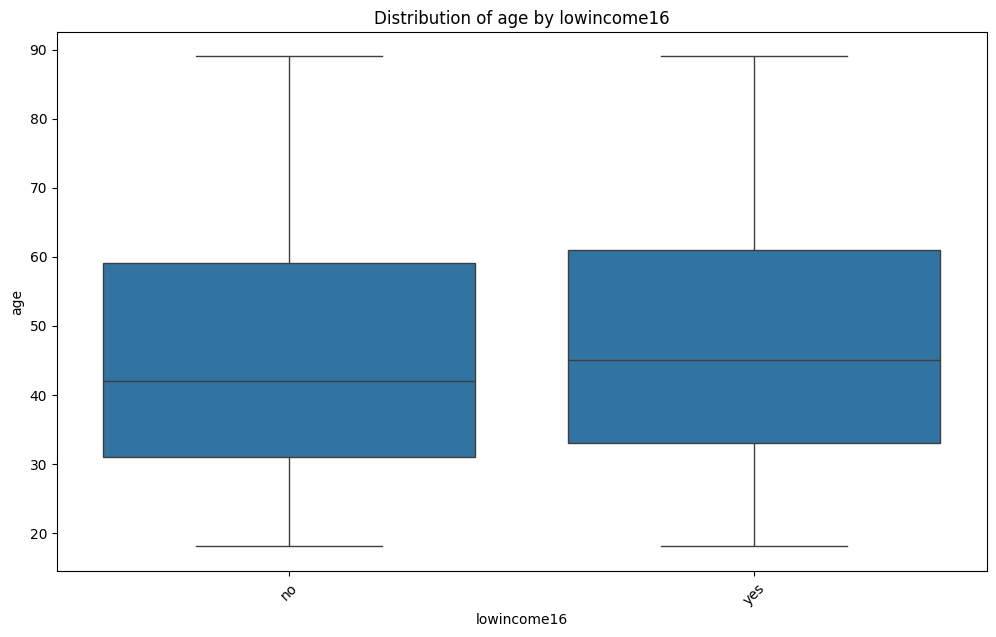


--- Summary Statistics for age grouped by lowincome16 ---
              count       mean        std   min   25%   50%   75%   max
lowincome16                                                            
no           7182.0  45.781537  18.127894  18.0  31.0  42.0  59.0  89.0
yes          1938.0  47.195562  17.105263  18.0  33.0  45.0  61.0  89.0




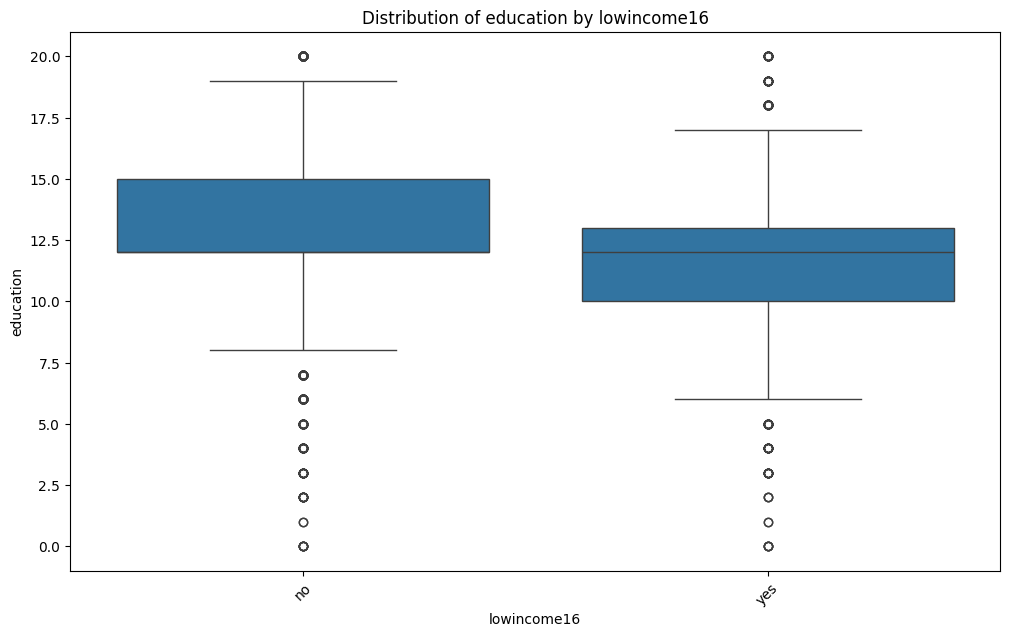


--- Summary Statistics for education grouped by lowincome16 ---
              count       mean       std  min   25%   50%   75%   max
lowincome16                                                          
no           7182.0  12.906294  2.845263  0.0  12.0  12.0  15.0  20.0
yes          1938.0  11.630031  3.133391  0.0  10.0  12.0  13.0  20.0




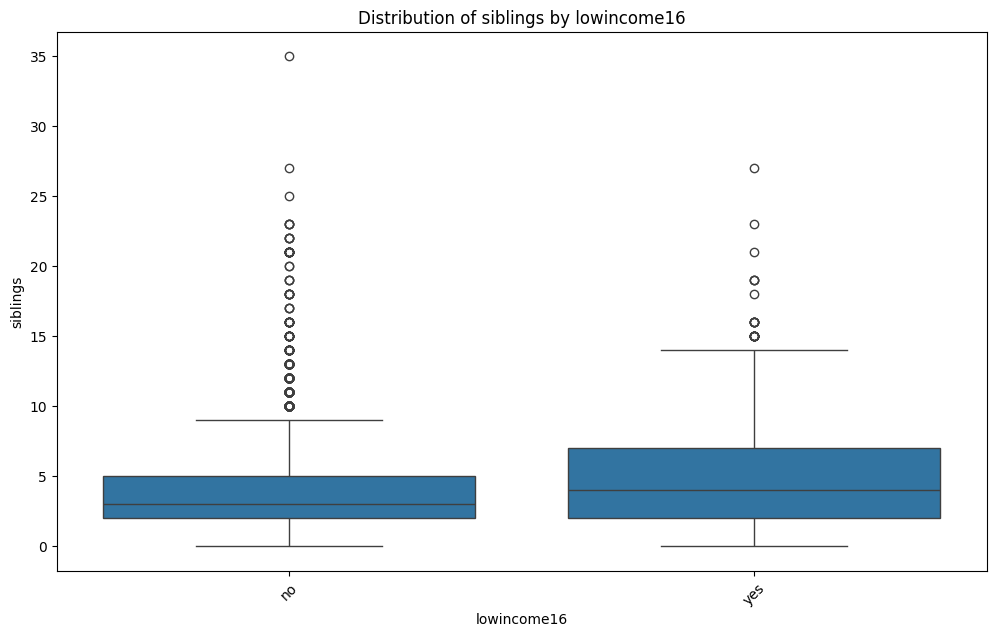


--- Summary Statistics for siblings grouped by lowincome16 ---
              count      mean       std  min  25%  50%  75%   max
lowincome16                                                      
no           7182.0  3.829992  3.155873  0.0  2.0  3.0  5.0  35.0
yes          1938.0  4.868421  3.440282  0.0  2.0  4.0  7.0  27.0




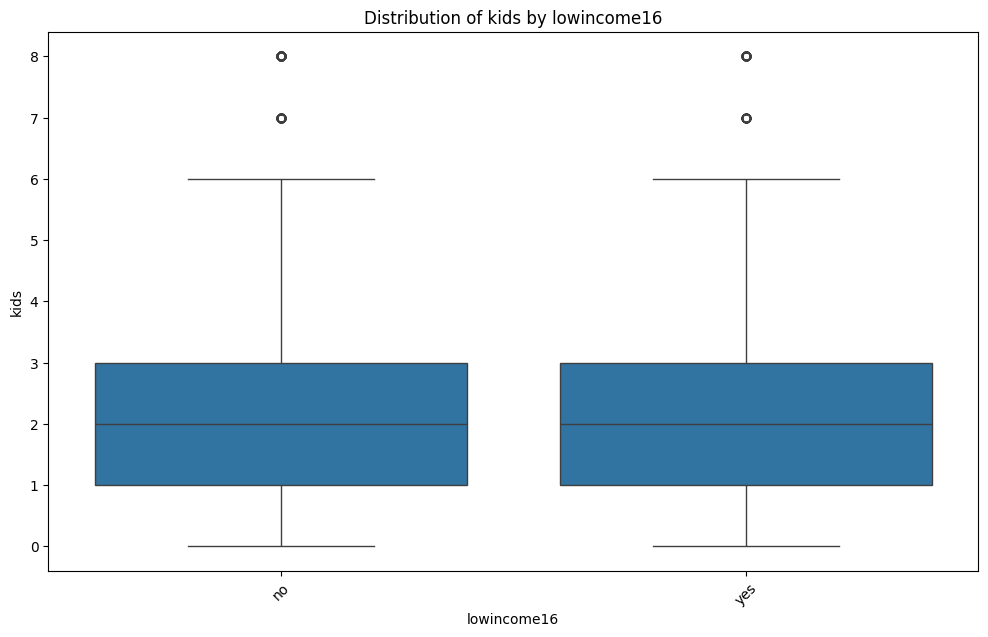


--- Summary Statistics for kids grouped by lowincome16 ---
              count      mean       std  min  25%  50%  75%  max
lowincome16                                                     
no           7182.0  1.988165  1.741152  0.0  1.0  2.0  3.0  8.0
yes          1938.0  2.401961  1.991447  0.0  1.0  2.0  3.0  8.0




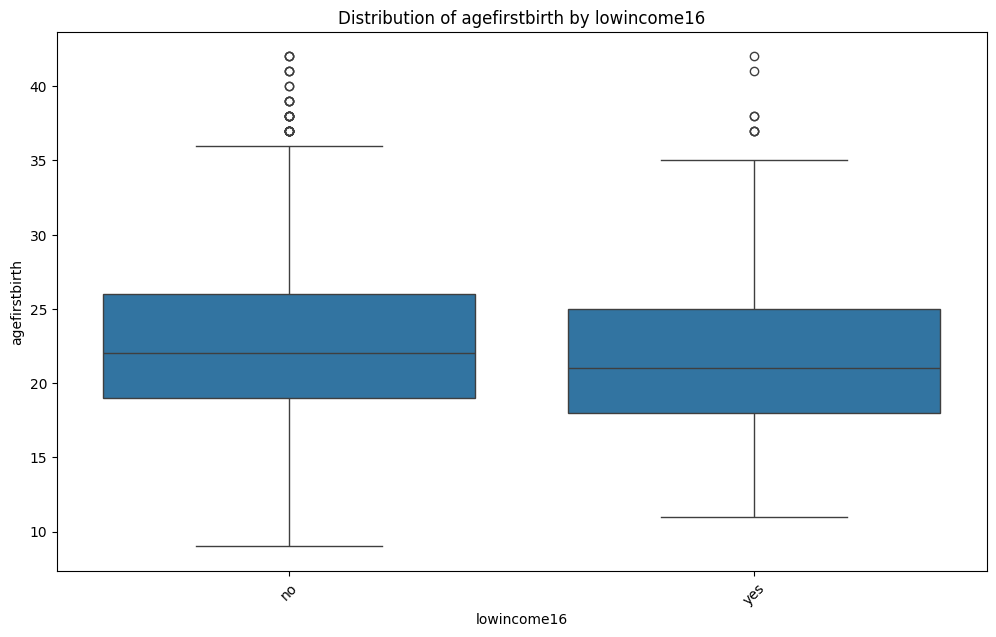


--- Summary Statistics for agefirstbirth grouped by lowincome16 ---
              count       mean       std   min   25%   50%   75%   max
lowincome16                                                           
no           2983.0  22.686222  4.831233   9.0  19.0  22.0  26.0  42.0
yes           329.0  22.127660  5.086040  11.0  18.0  21.0  25.0  42.0




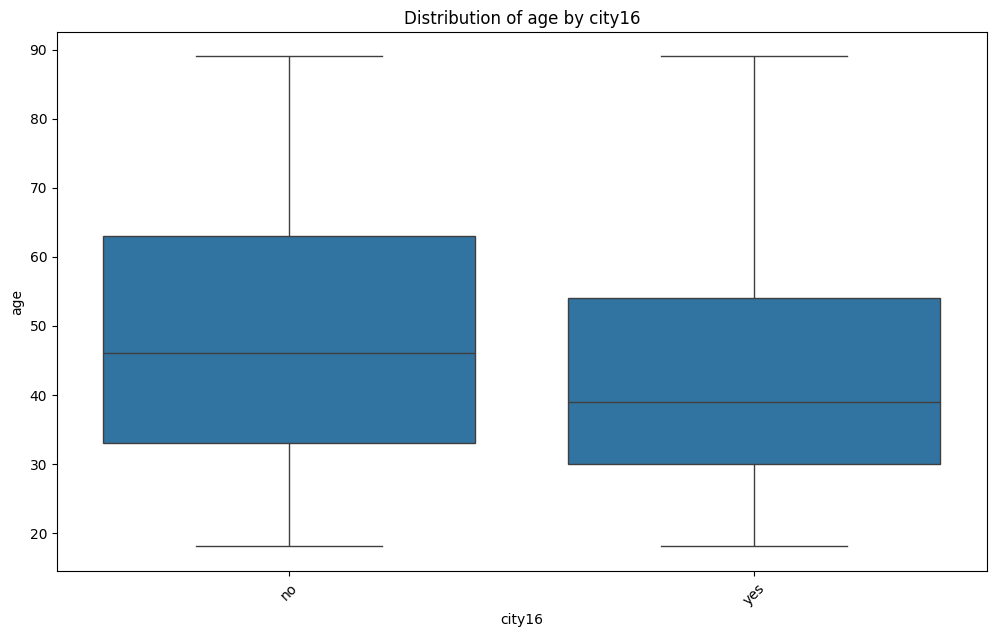


--- Summary Statistics for age grouped by city16 ---
         count      mean        std   min   25%   50%   75%   max
city16                                                           
no      5246.0  48.38353  18.339923  18.0  33.0  46.0  63.0  89.0
yes     3874.0  42.96541  16.853091  18.0  30.0  39.0  54.0  89.0




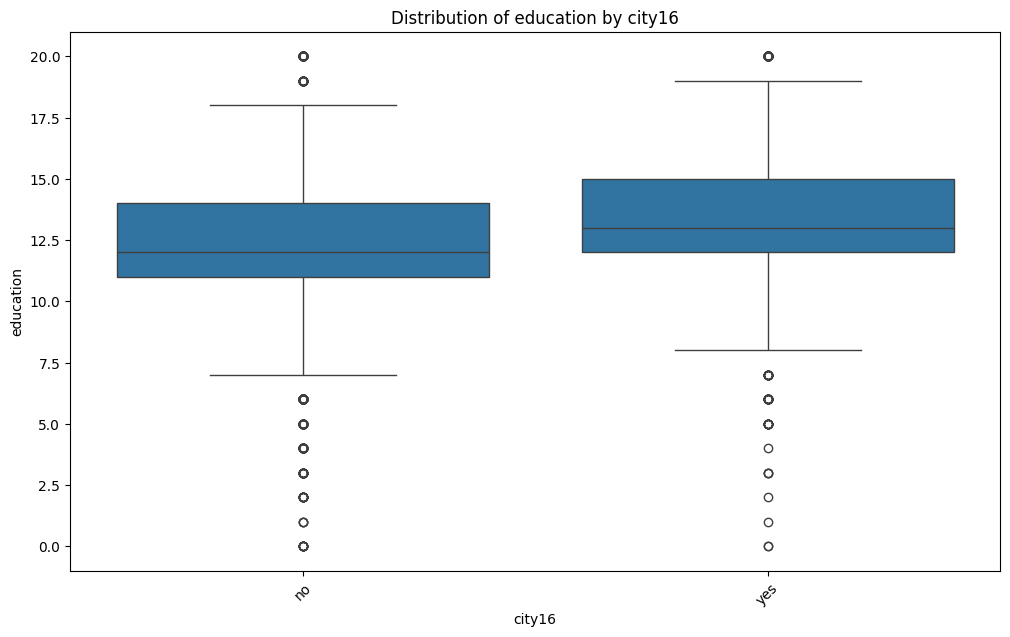


--- Summary Statistics for education grouped by city16 ---
         count       mean       std  min   25%   50%   75%   max
city16                                                          
no      5246.0  12.160884  3.049581  0.0  11.0  12.0  14.0  20.0
yes     3874.0  13.277233  2.692726  0.0  12.0  13.0  15.0  20.0




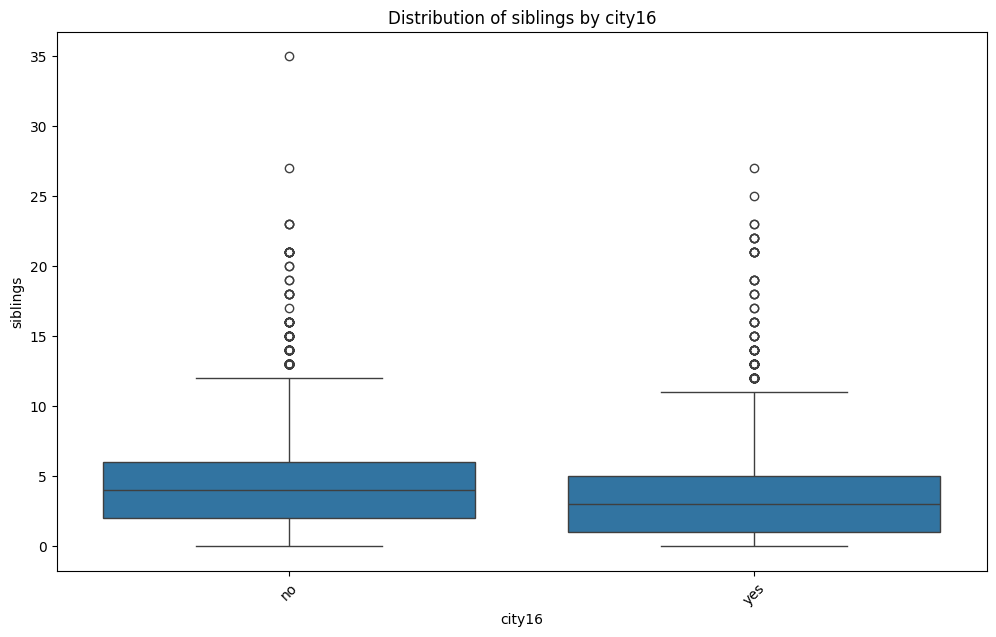


--- Summary Statistics for siblings grouped by city16 ---
         count      mean       std  min  25%  50%  75%   max
city16                                                      
no      5246.0  4.422036  3.343665  0.0  2.0  4.0  6.0  35.0
yes     3874.0  3.547754  3.038086  0.0  1.0  3.0  5.0  27.0




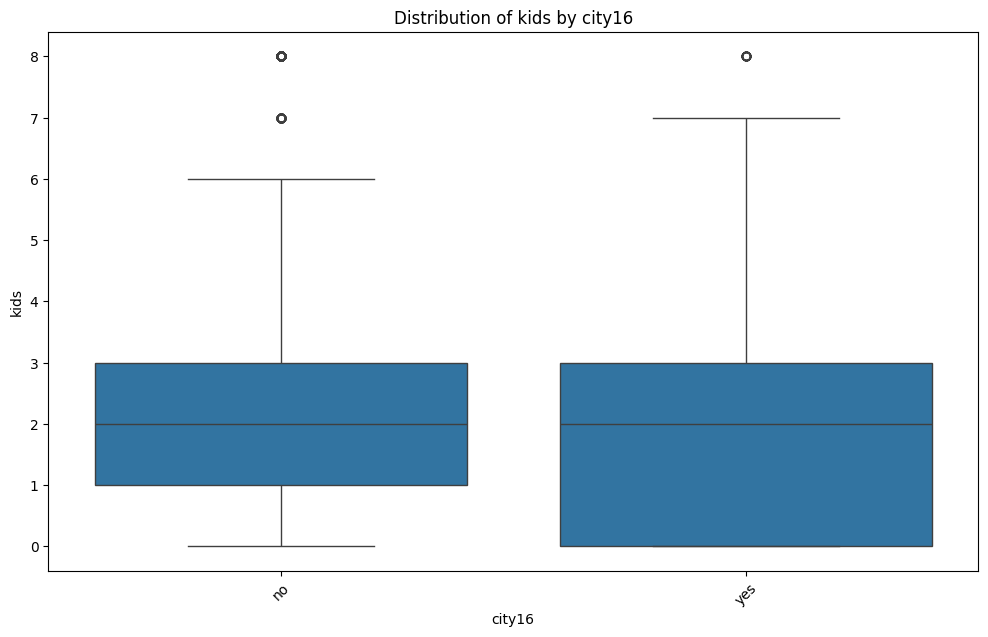


--- Summary Statistics for kids grouped by city16 ---
         count      mean       std  min  25%  50%  75%  max
city16                                                     
no      5246.0  2.251811  1.892454  0.0  1.0  2.0  3.0  8.0
yes     3874.0  1.838152  1.650257  0.0  0.0  2.0  3.0  8.0




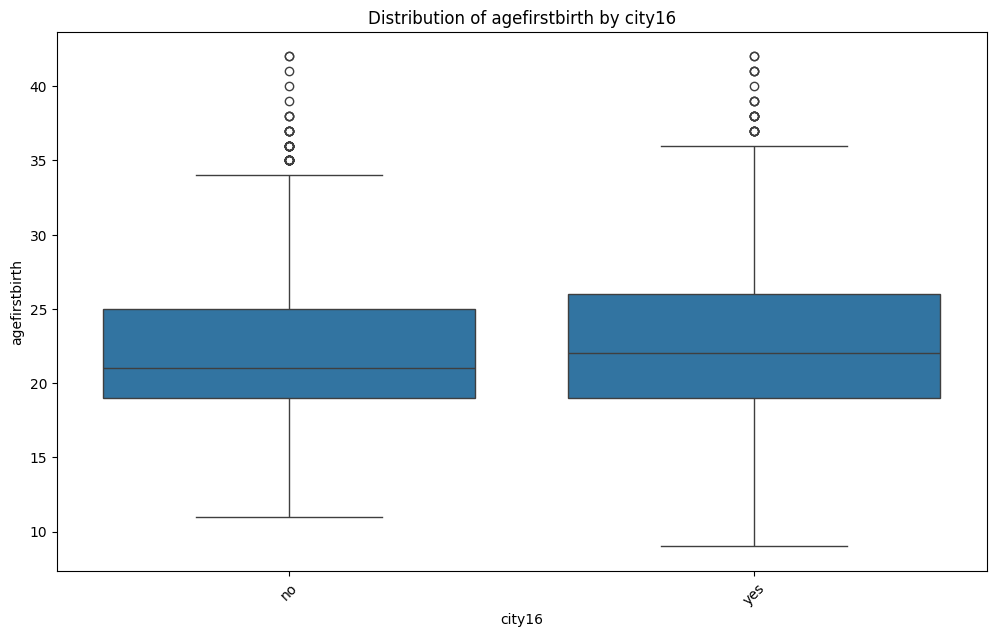


--- Summary Statistics for agefirstbirth grouped by city16 ---
         count       mean       std   min   25%   50%   75%   max
city16                                                           
no      1877.0  22.445392  4.678334  11.0  19.0  21.0  25.0  42.0
yes     1435.0  22.873171  5.077566   9.0  19.0  22.0  26.0  42.0




In [26]:
numerical_columns = ['age', 'education', 'siblings', 'kids', 'agefirstbirth']
categorical_columns = ['ethnicity', 'immigrant', 'lowincome16', 'city16']

print("--- Numerical vs. Categorical Analysis ---")

for cat_col in categorical_columns:

    for num_col in numerical_columns:

        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'Distribution of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

        print(f"\n--- Summary Statistics for {num_col} grouped by {cat_col} ---")
        print(df.groupby(cat_col)[num_col].describe())
        print("\n" + "="*50 + "\n")
